
Conclusion :

L’étude de la fonction U(t) montre que le nombre d’utilisateurs diminue au début,
puis atteint un minimum vers t ≈ 2.33 mois avant de repartir à la hausse.
La dérivée U'(t) est strictement croissante, ce qui garantit un seul point critique
et une évolution régulière ensuite.

La croissance reste inférieure au seuil de 0.2 uniquement jusqu’à t ≈ 2.96 mois.
Au-delà, elle devient durablement exploitable.

Le modèle décrit donc une application qui traverse une courte phase de recul
avant d’entrer dans une dynamique de croissance continue.



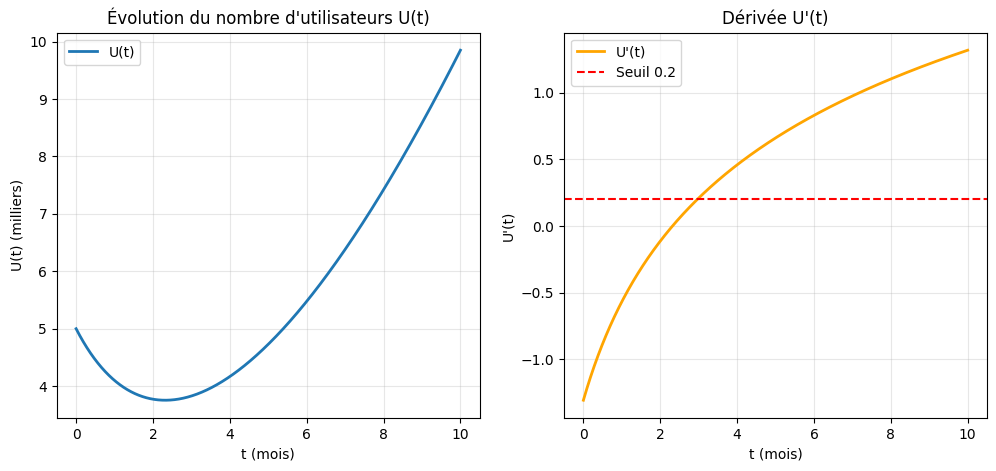

In [87]:
conclusion = """
Conclusion :

L’étude de la fonction U(t) montre que le nombre d’utilisateurs diminue au début,
puis atteint un minimum vers t ≈ 2.33 mois avant de repartir à la hausse.
La dérivée U'(t) est strictement croissante, ce qui garantit un seul point critique
et une évolution régulière ensuite.

La croissance reste inférieure au seuil de 0.2 uniquement jusqu’à t ≈ 2.96 mois.
Au-delà, elle devient durablement exploitable.

Le modèle décrit donc une application qui traverse une courte phase de recul
avant d’entrer dans une dynamique de croissance continue.
"""

print(conclusion)


import numpy as np
import matplotlib.pyplot as plt

# Définition de U(t)
def U(t):
    return 5 + t*np.log(t + 2) - 2*t

# Intervalle de t fin bcp de valeurs
t = np.linspace(0, 10, 200000)

# U'(t)
def f(t):
    return np.log(t + 2) + t/(t + 2) - 2


# Figures
plt.figure(figsize=(12, 5))

# fonction U(t)
plt.subplot(1, 2, 1)
plt.plot(t, U(t), label="U(t)", linewidth=2)
plt.title("Évolution du nombre d'utilisateurs U(t)")
plt.xlabel("t (mois)")
plt.ylabel("U(t) (milliers)")
plt.grid(True, alpha=0.3)
plt.legend()

# dérivée f(t) = U'(t)
plt.subplot(1, 2, 2)
plt.plot(t, f(t), label="U'(t)", color="orange", linewidth=2)
plt.axhline(0.2, color="red", linestyle="--", label="Seuil 0.2")
plt.title("Dérivée U'(t)")
plt.xlabel("t (mois)")
plt.ylabel("U'(t)")
plt.grid(True, alpha=0.3)
plt.legend()

# Grille + légende
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

In [85]:
"""
Recherche de la racine
"""

# Intervalle où f change de signe : f(0) < 0 et f(20) > 0
a, b = 0, 20
epsilon = 1e-6

while (b - a) > epsilon:
    m = (a + b) / 2
    if f(a) * f(m) <= 0:
        b = m
    else:
        a = m

x0 = m
print("Racine", x0)

Racine 2.3191362619400024


In [86]:
import numpy as np

def f(t):
    return np.log(t + 2) + t/(t + 2) - 2   # U'(t)

def fprime(t):
    return (t + 4) / ( t + 2 )**2

# Pour conclure sur le signe de la dérivée fprime donc la dérivée U'' est toujours positive, la forme est convexe
# Cela dit qu'on ne fait que gagner des utilisateurs
print( "Signe de f > 0 sur l'intervalle t " if np.all(fprime(t)) > 0 else  "On ne peut pas conclure")

data = f(t)

"""
La croissance est faible (U'(t)<0.2) pour t < 2.96 mois.
À partir de t ≈ 2.96 mois, la croissance devient exploitable et ne redevient jamais faible.
"""
# mask : là où U'(t) passe SOUS 0.2 pour la dernière fois
mask = data < 0.2

# on prend le DERNIER t où c’est encore vrai
t_result = t[mask][-1]

print("t ~ ", t_result)

Signe de f > 0 sur l'intervalle t 
t ~  2.96641483207416


In [89]:
# Autre méthodes
# Condition : 0 < U'(t) < 0.2
mask = (data > 0) & (data < 0.2)

# t où cette condition est vraie
t_interval = t[mask]

t_start = t_interval[0]      # début de la zone
t_end   = t_interval[-1]     # fin de la zone

print("La croissance est positive mais faible pour t dans (%.4f , %.4f)" % (t_start, t_end))

La croissance est positive mais faible pour t dans (2.3192 , 2.9664)


In [90]:
t[mask]

array([2.3191616 , 2.3192116 , 2.3192616 , ..., 2.96631483, 2.96636483,
       2.96641483], shape=(12946,))

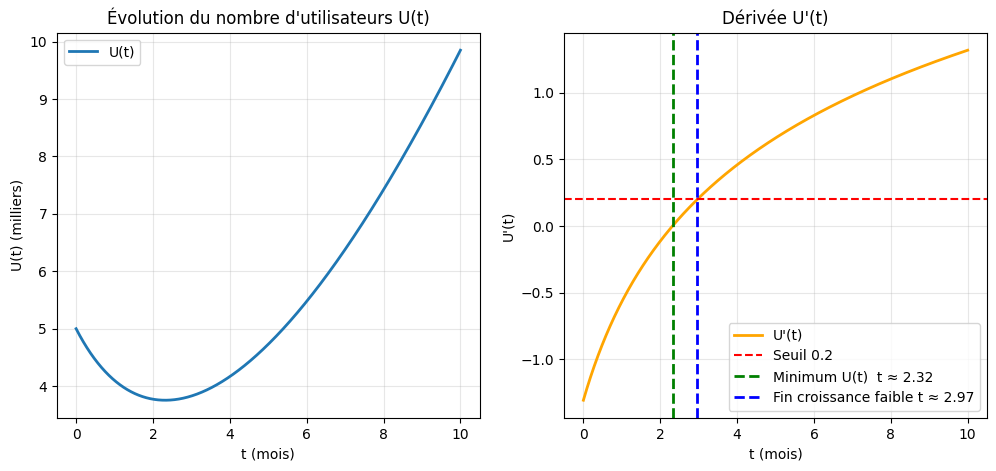

In [94]:

# Figures
plt.figure(figsize=(12, 5))

# fonction U(t)
plt.subplot(1, 2, 1)
plt.plot(t, U(t), label="U(t)", linewidth=2)
plt.title("Évolution du nombre d'utilisateurs U(t)")
plt.xlabel("t (mois)")
plt.ylabel("U(t) (milliers)")
plt.grid(True, alpha=0.3)
plt.legend()

# dérivée f(t) = U'(t)
plt.subplot(1, 2, 2)
plt.plot(t, f(t), label="U'(t)", color="orange", linewidth=2)
plt.axhline(0.2, color="red", linestyle="--", label="Seuil 0.2")
plt.title("Dérivée U'(t)")
plt.xlabel("t (mois)")
plt.ylabel("U'(t)")
plt.grid(True, alpha=0.3)
plt.legend()

plt.axvline(t_start, color="green", linestyle="--", linewidth=2,
            label=f"Minimum U(t)  t ≈ {t_start:.2f}")

plt.axvline(t_end, color="blue", linestyle="--", linewidth=2,
            label=f"Fin croissance faible t ≈ {t_end:.2f}")

# Grille + légende
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()